# Week 3 Introduction to image processing assignment

# importing the required libraries

In [1]:
!pip install pydicom
import pydicom
import numpy as np 
import glob 
import os
import matplotlib.pyplot as plt
import json 
from ipywidgets import interact, interactive
from typing import List, Tuple, Union

Defaulting to user installation because normal site-packages is not writeable


# downloading the data
#### In this section we are going to download a public dataset and unzip it for later usage. 

In [3]:
# ! wget --no-check-certificate https://data.idoimaging.com/dicom/1010_brain_mr/1010_brain_mr_04_lee.zip
# ! unzip 1010_brain_mr_04_lee.zip

In [4]:
dir_path = '/home/shirshak/0 0 0 0SPARK AI academy/Week 2/Week 2-3 _ Introduction to Image Processing Image Input - Output/Assignment/1010_brain_mr_04_lee'

# Excercise 1: Read Dicom files from a directory. 
For this question, you need to read all the `.dcm` files inside the provided directory slice by slice, and return the loaded slices in a format of a single `Numpy List` variable. 

* Define a function for reading the DICOM files and sort them based on their `instance numbers`
* Access the patient ID from the dicom object using the following ways and print them: 
  - indexing 
  - attributes (tags)

In [5]:
# solution
def load_dicom_slices(dir_path: str, force: bool=False):
    slices = list()
    for filename in os.listdir(dir_path):
        if filename.endswith(".dcm"):
            file_path = os.path.join(dir_path,filename)
            dicom_data = pydicom.dcmread(file_path)
            slices.append(dicom_data)
    slices.sort(key=lambda x:int(x.InstanceNumber))
    return slices

slices = load_dicom_slices(dir_path)
print("Number of slices: ", len(slices))
print('Slices dtype: ', type(slices[0]))

Number of slices:  32
Slices dtype:  <class 'pydicom.dataset.FileDataset'>


In [6]:
# Viewing slices shape. 
print("Volume Shape (Row, Column): ", slices[0].Rows, slices[0].Rows)

Volume Shape (Row, Column):  256 256


In [7]:
# interactive slides for viewing dicom slides
plt.figure(1, figsize=(10, 10))
def dicom_animation(x):
    plt.imshow(slices[x].pixel_array, cmap=plt.cm.bone)
    plt.colorbar()
    return x

interact(dicom_animation, x=(0, len(slices)-1))

<Figure size 1000x1000 with 0 Axes>

interactive(children=(IntSlider(value=15, description='x', max=31), Output()), _dom_classes=('widget-interact'…

<function __main__.dicom_animation(x)>

In [8]:
slices[0]

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 222
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.5962.99.1.1647423216.1757746261.1397511827184.202.0
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.5962.99.2
(0002, 0013) Implementation Version Name         SH: 'PIXELMEDJAVA001'
(0002, 0016) Source Application Entity Title     AE: 'DicomBrowser'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M', 'ND']
(0008, 0012) Instance Creation Date              DA: '20080801'
(0008, 0013) Instance Creation Time              TM: '002858.434'
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 001

In [9]:
# Accessing the patient id. 
# Your code here. 
patient_id = slices[0].PatientID
# OR 
patient_id = slices[0].get("PatientID")
print(patient_id)

1010


# Exercise 2: 
#### For this exercise you need to implement four function and try applying them on the loaded slices. 
* Define a function named `to_hu` for transforming the slices into Hounsfield scale. 
* Define a function named `window_clip` for cliping the pixel intensity range of each slice using a single center and windows width. Defined window describes your interested intensity range. 
* Define a function named `to_3d_numpy` to convert all the slices into a single Numpy ndarray image. This function is able to change the datatype of the output image if the user likes to change the new image datatype. 
* Define a function named `min_max_scaler` to scale a Numpy array into range `0` and `1` for easier visualization with matplotlib. This function is able to change the datatype (optional dtype by user) of the output image to `float`. 



In [10]:
def to_hu(slices: List):
    """Transform a list of slices to a Hounsfield Unit Scale. 
    This function takes the loaded slices and return a list of transformed Numpy array format slices. 
    """
    hu_slices = []
    intercept = slices[0].RescaleIntercept if 'RescaleIntercept' in slices[0] else 0
    slope = slices[0].RescaleSlope if 'RescaleSlope' in slices[0] else 1
    for sli in slices: 
        # Your code here. 
        hu_slice = np.array(sli.pixel_array, dtype=np.float64)
        hu_slice *= slope
        hu_slice +=intercept
        hu_slices.append(hu_slice)
    return hu_slices

def window_clip(slices: List, window_cent: int, window_width: int):
    """Clip a list of slices pixels, one by one, into a specific intensity range based on the provided window location and size.
    All the pixels inside each single slice with a intensity below and over the window range will be clipped into the min and max intensity range window covers. 
    This function returns a list of clipped Numpy array slices. 
    """
    min_val = window_cent - window_width // 2
    max_val = window_cent + window_width // 2
    cliped_slices = []
    for sli in slices: 
        # Your code here. 
        cliped_slice = np.clip(sli,min_val,max_val)
        cliped_slices.append(cliped_slice)
    return cliped_slices

def to_3d_numpy(slices: List, dtype=None): 
    """Stack up all slices into a single NumPy array of the provided data type.
    """
    # Your code here. 
    image = np.stack(slices)
    return image

def min_max_scaler(image: np.ndarray, dtype: Union[type, None]=None): 
    """Scale a single Numpy array image intensity into range `0` and `1`
    """
    # Your code here. 
    image = (image - np.min(image)) / (np.max(image) - np.min(image))
    return image

def visualizer(slice: np.ndarray, title= ''): 
    """Visualize a slice of type numpy array with the provided title."""
    plt.imshow(slice, cmap=plt.cm.bone)
    plt.title(title)
    plt.show()

Numpy array image shape is:  (32, 256, 216)
Transformed image pixel value range (min, max):  (0.0, 1000.0)
Scaled image pixel value range (min, max):  (0.0, 1.0)


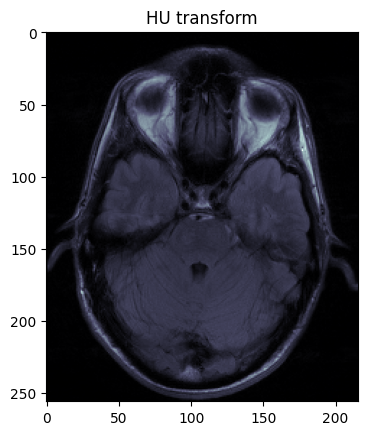

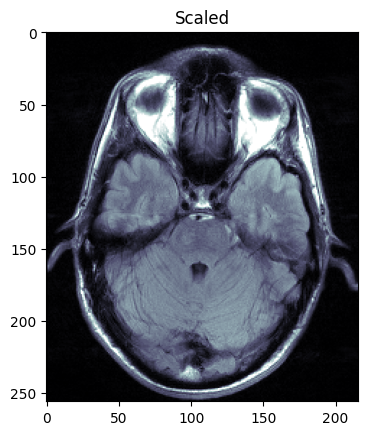

In [11]:
processed_slices_hu = to_hu(slices)
processed_slices_cliped = window_clip(processed_slices_hu, 500, 1000) # Extracting soft tissues. 
image = to_3d_numpy(processed_slices_cliped, dtype=None)

print('Numpy array image shape is: ', image.shape)
print('Transformed image pixel value range (min, max): ', (image.min(), image.max()))

scaled_image = min_max_scaler(image, dtype=np.float32)
print('Scaled image pixel value range (min, max): ', (scaled_image.min(), scaled_image.max()))

# You can see the scaled version of your slected region using the `window_clip` function here.
visualizer(processed_slices_hu[10], 'HU transform')
visualizer(scaled_image[10], 'Scaled')

# Exercise 3: Saving the data in numpy format
* Convert original frames into a numpy image array without any preprocessing, and save it as a single `.npy` file named `original_numpy_version.npy`. Keeping the original slices as a 3d numpy sample in case we needed it in the future.
* Create an ouput folder named `scaled_slices` and save all the scaled slices one by one into the folder. Assign a unique name to each slice while you are keeping the original order. 

In [13]:
# Convert the original slices into a 3d nmpy array and save it as a .npy file format. 
# Your code here.
original_numpy_array = to_3d_numpy(scaled_image)
np.save("original_np_version.npy",original_numpy_array)

In [19]:
# Create a folder and save the scaled slices one by one. 
# Your code here.
output_folder = "scaled_slices"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
for i, scaled_slice in enumerate(scaled_image):
    file_name = f"slice_{i}.npy"
    file_path = os.path.join(output_folder, file_name)
    np.save(file_path, scaled_slice)

# Exercise 4: Save the processed numpy data as a series of DICOM files
#### In this section, you need to save the scaled version image of the loaded dicom slices into a series of dicom files inside a directory named `scaled_slices_dicom`, be splitting the image into a sequence of slices in the original order.  
To do so, you need to create a new dicom dataset for each slide, import the original dicom information into the new created dataset, and save it with a unique name inside the mentioned directory.

In [21]:
from pydicom.dataset import Dataset, FileDataset
from pydicom.uid import ExplicitVRLittleEndian
import pydicom._storage_sopclass_uids

output_dir = 'scaled_slices_dicom'
os.makedirs(output_dir, exist_ok=True)

# Your code here.
for i, scaled_slice in enumerate(scaled_image):
    ds = Dataset()
    # We now set necessary information into new dataset 
    ds.PixelData = scaled_slice.tobytes()
    ds.Rows, ds.Columns = scaled_slice.shape

    # Saving new DICOM dataset as DICOM file 
    file_name = os.path.join(output_dir,f"slice_{i}.dcm")
    with open(file_name,"wb") as f:
        ds.file_meta = Dataset()
        ds.file_meta.MediaStorageSOPClassUID = pydicom._storage_sopclass_uids.MRImageStorage
        ds.file_meta.MediaStorageSOPInstanceUID = pydicom.uid.generate_uid()
        ds.file_meta.TransferSyntaxUID = ExplicitVRLittleEndian

        ds.is_little_endian = True # byte order in in DICOM file will be little_endian
        ds.is_implicit_VR = True # DICOM file will use implicit VR encoding

        # write dataset to file 
        ds.save_as(f)